# Notebook Imports

In [805]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [806]:
boston_dataset = load_boston()
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

## Data Exploration with Pandas dataframes

In [807]:
#Create DataFrame
data = pd.DataFrame(data=boston_dataset.data, columns = boston_dataset.feature_names)

#Add column with the price (target)
data['PRICE'] = boston_dataset.target


In [808]:
#Top 5 Rows look like this:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [809]:
#Last 5 Rows look like this:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [810]:
#Cuantos datos por columna
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [811]:
#Check if columns have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising data - Histograms, Distribution and Bar Charts
### Create charts to visualize the data

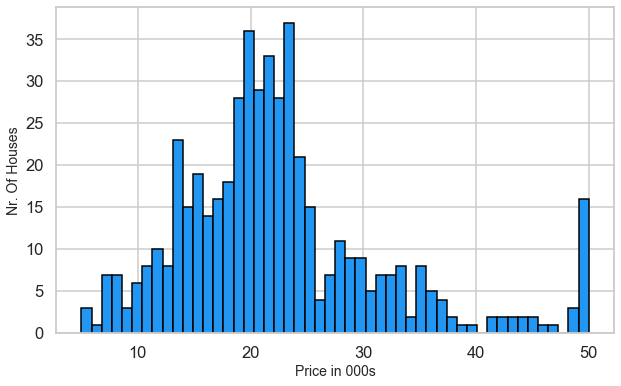

In [812]:
#Histogram using plt
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black',color='#2196f3')
plt.xlabel('Price in 000s',fontsize=14)
plt.ylabel('Nr. Of Houses',fontsize=14)
plt.show()

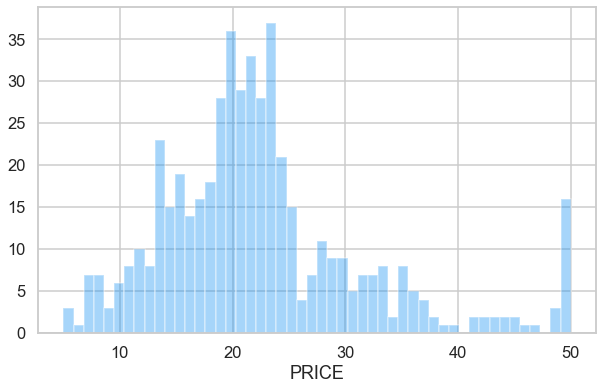

In [813]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,hist=True,kde=False,color='#2196f3')
plt.show()

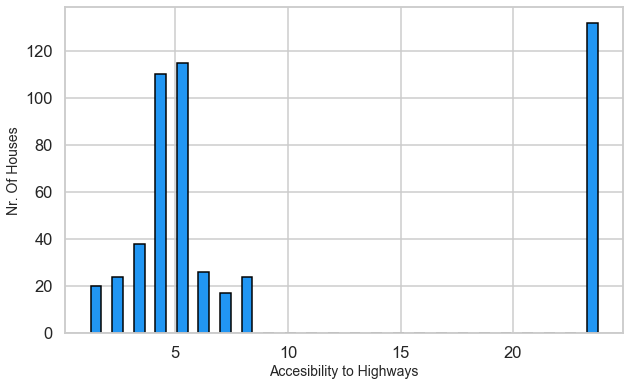

In [814]:
#Histogram
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],ec='black',color='#2196f3',bins=24,rwidth=0.5)
plt.xlabel('Accesibility to Highways',fontsize=14)
plt.ylabel('Nr. Of Houses',fontsize=14)
plt.show()

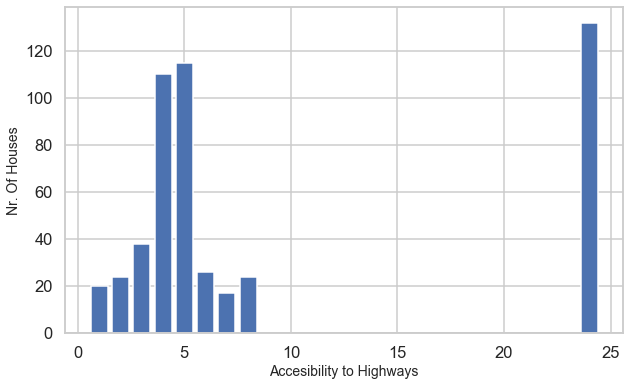

In [815]:
#Bar Chart
frequency = data['RAD'].value_counts()


plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.xlabel('Accesibility to Highways',fontsize=14)
plt.ylabel('Nr. Of Houses',fontsize=14)
plt.show()

# Exploring data
## Descrpitic Statistics

In [816]:
#Get all descriptic statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
### Find the correlations between features and targets, strength, direction and Multicollinearity
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [817]:
#Get specific correlations
print(data['PRICE'].corr(data['RM']))
print(data['PRICE'].corr(data['PTRATIO']))

0.695359947071539
-0.5077866855375615


In [818]:
#Get All correlations
data.corr() #Pearson correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [819]:
#Creating mask for heatmap of correlations
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

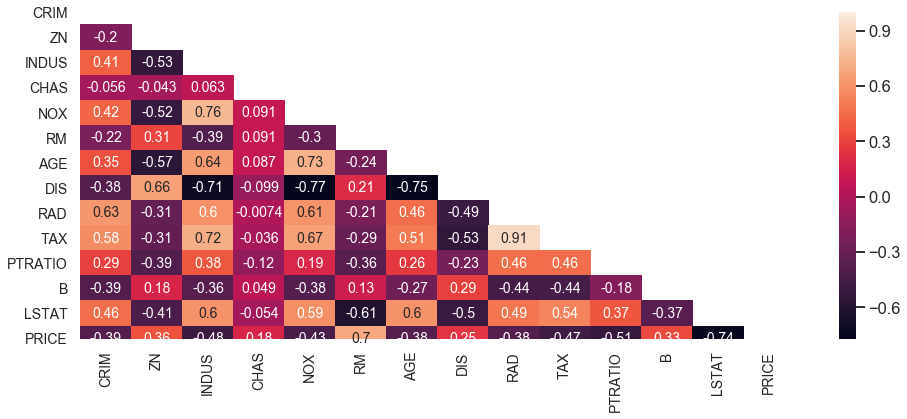

In [820]:
#HeatMap with SNS of correlations
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),mask=mask,annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

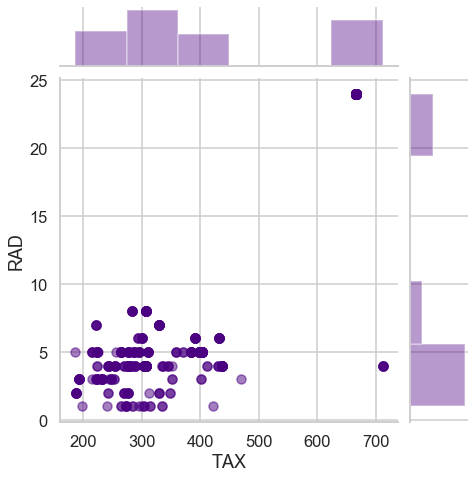

In [821]:
#Scatter plot for single correlation with sns
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],kind='scatter',height=7,color='indigo',joint_kws={'alpha':0.5})
#We can change the kind parameter to hex for a cooler effect!
plt.show()

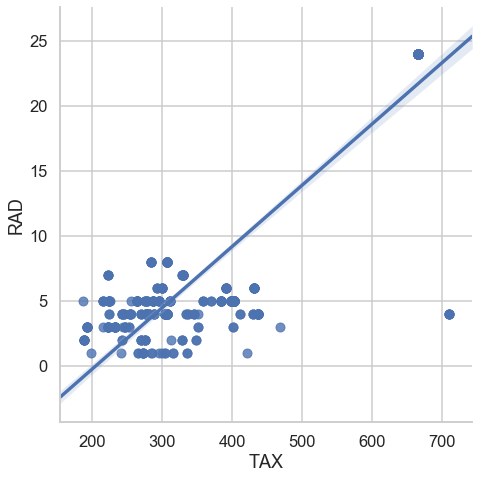

In [822]:
#Draw the Linear Regretion with sns
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

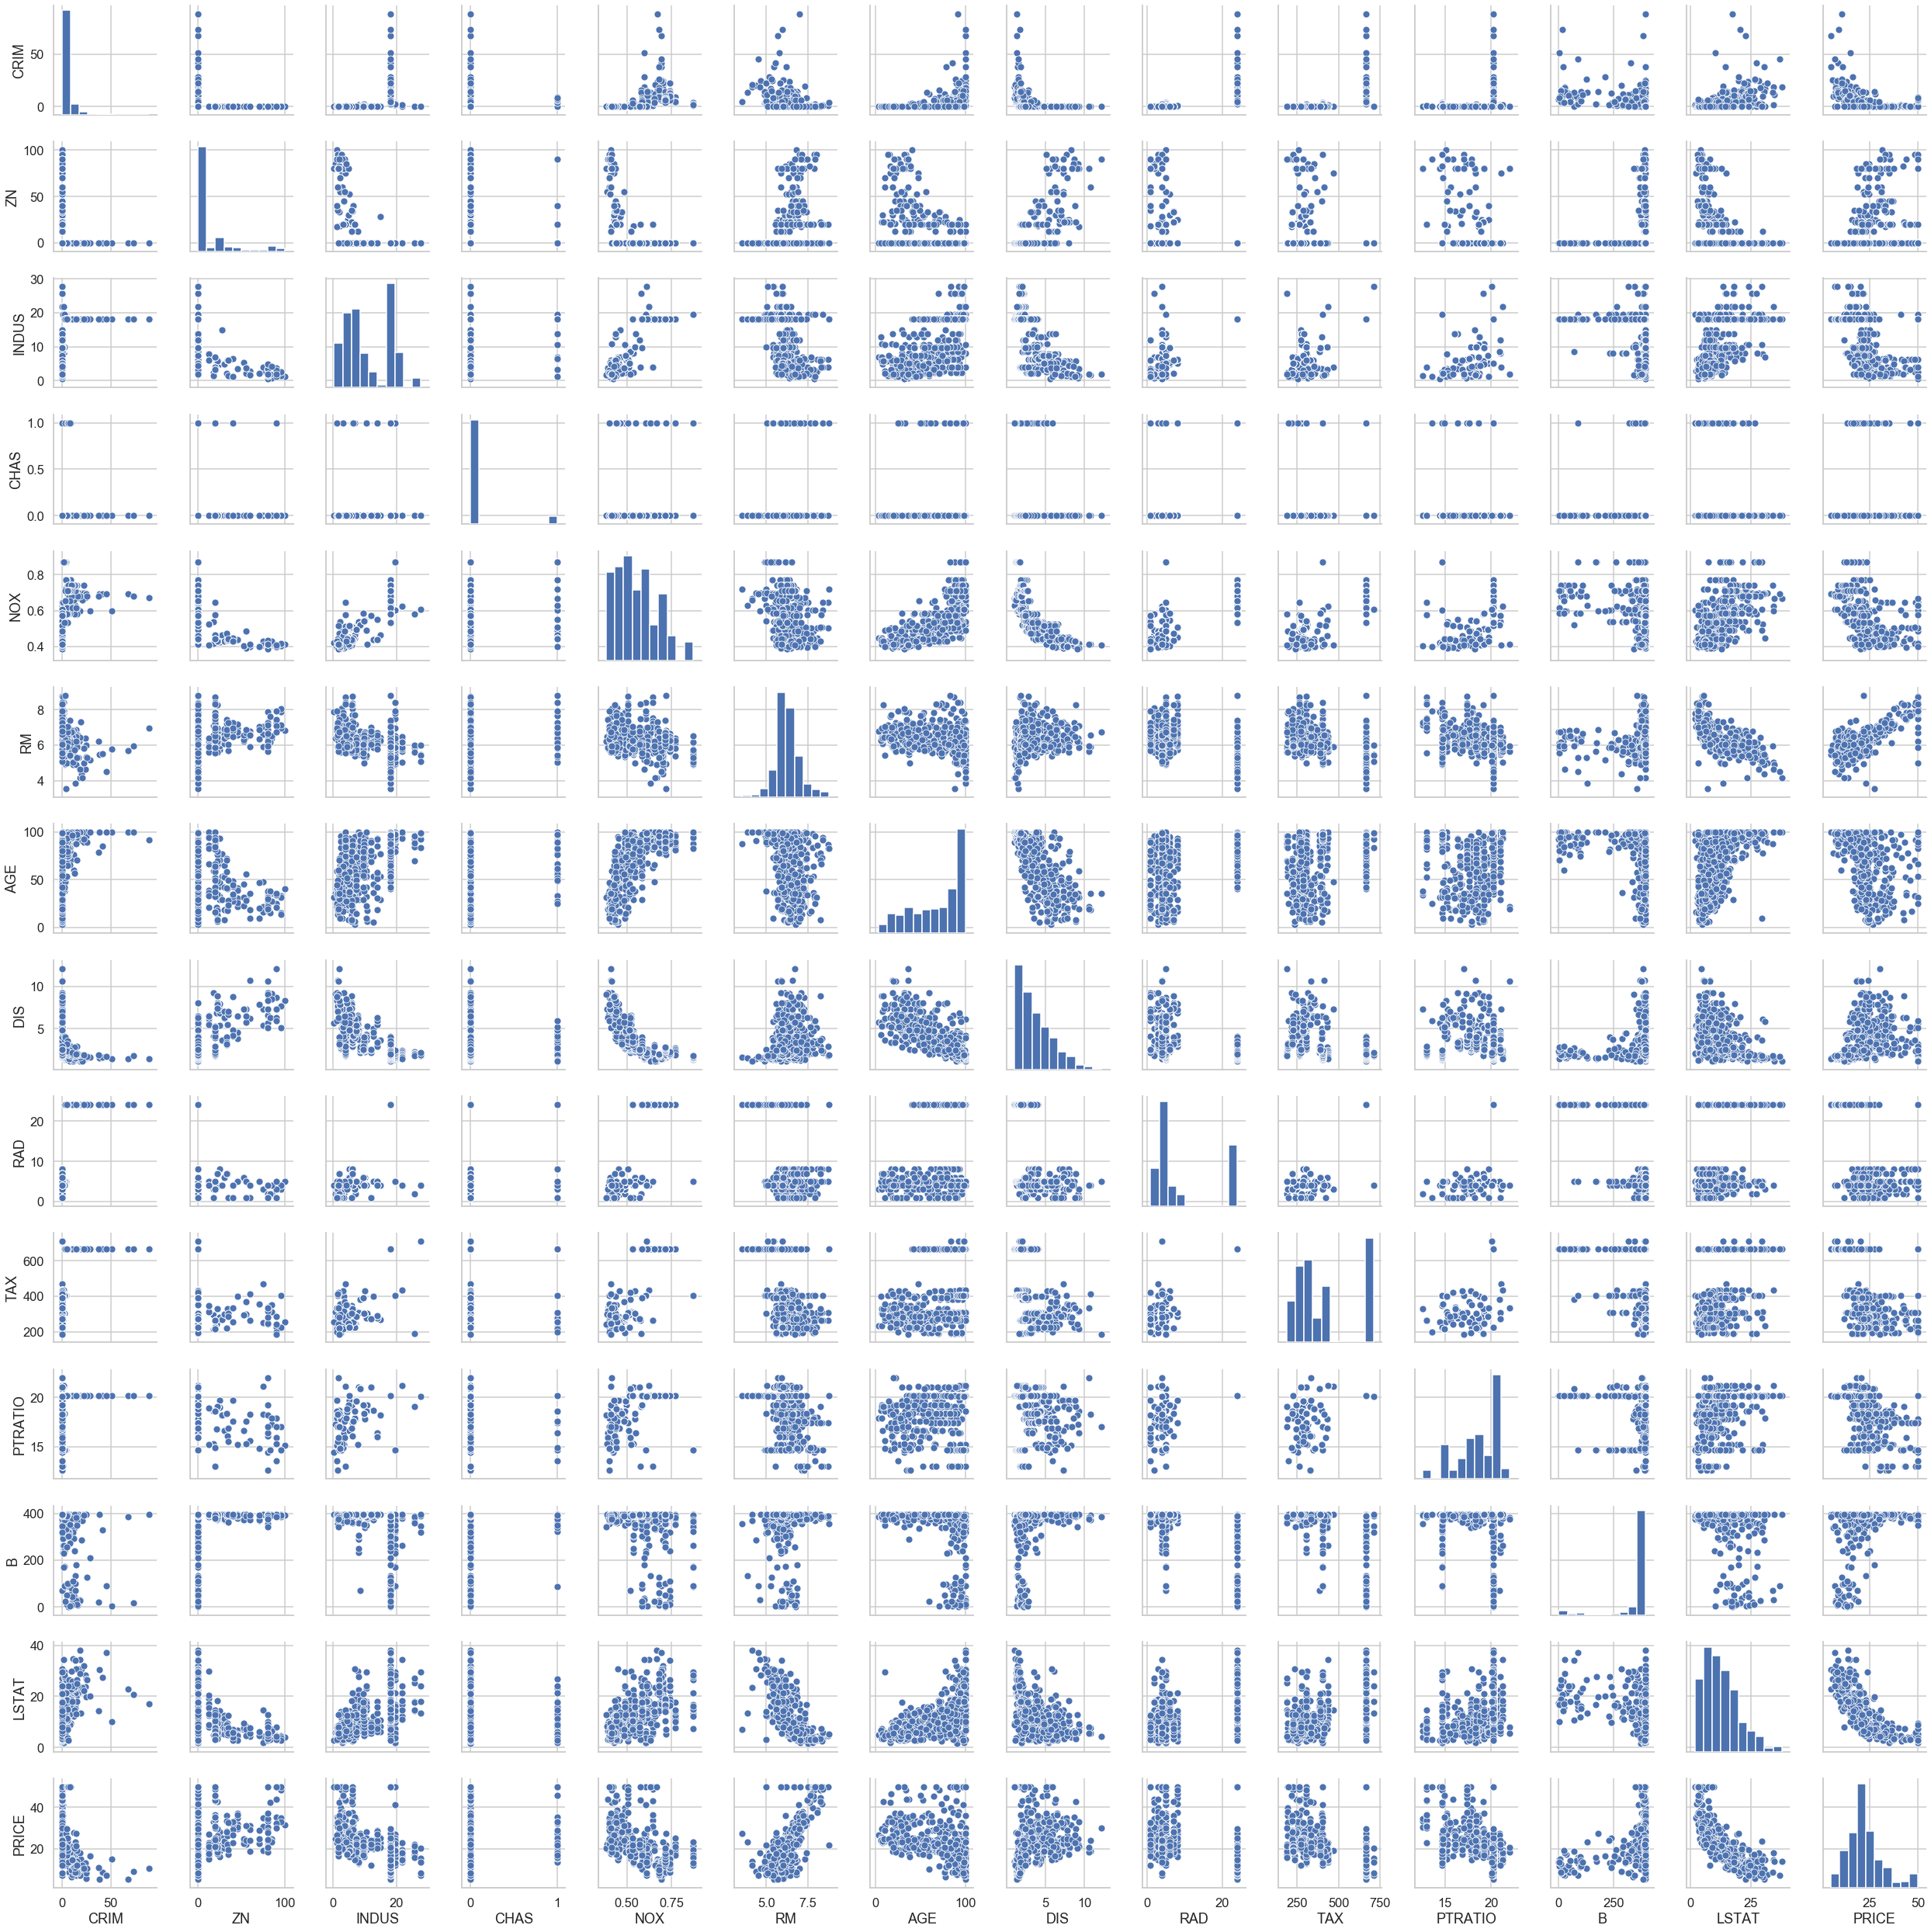

In [823]:
#Plot all of the correlations
sns.pairplot(data)
plt.show()

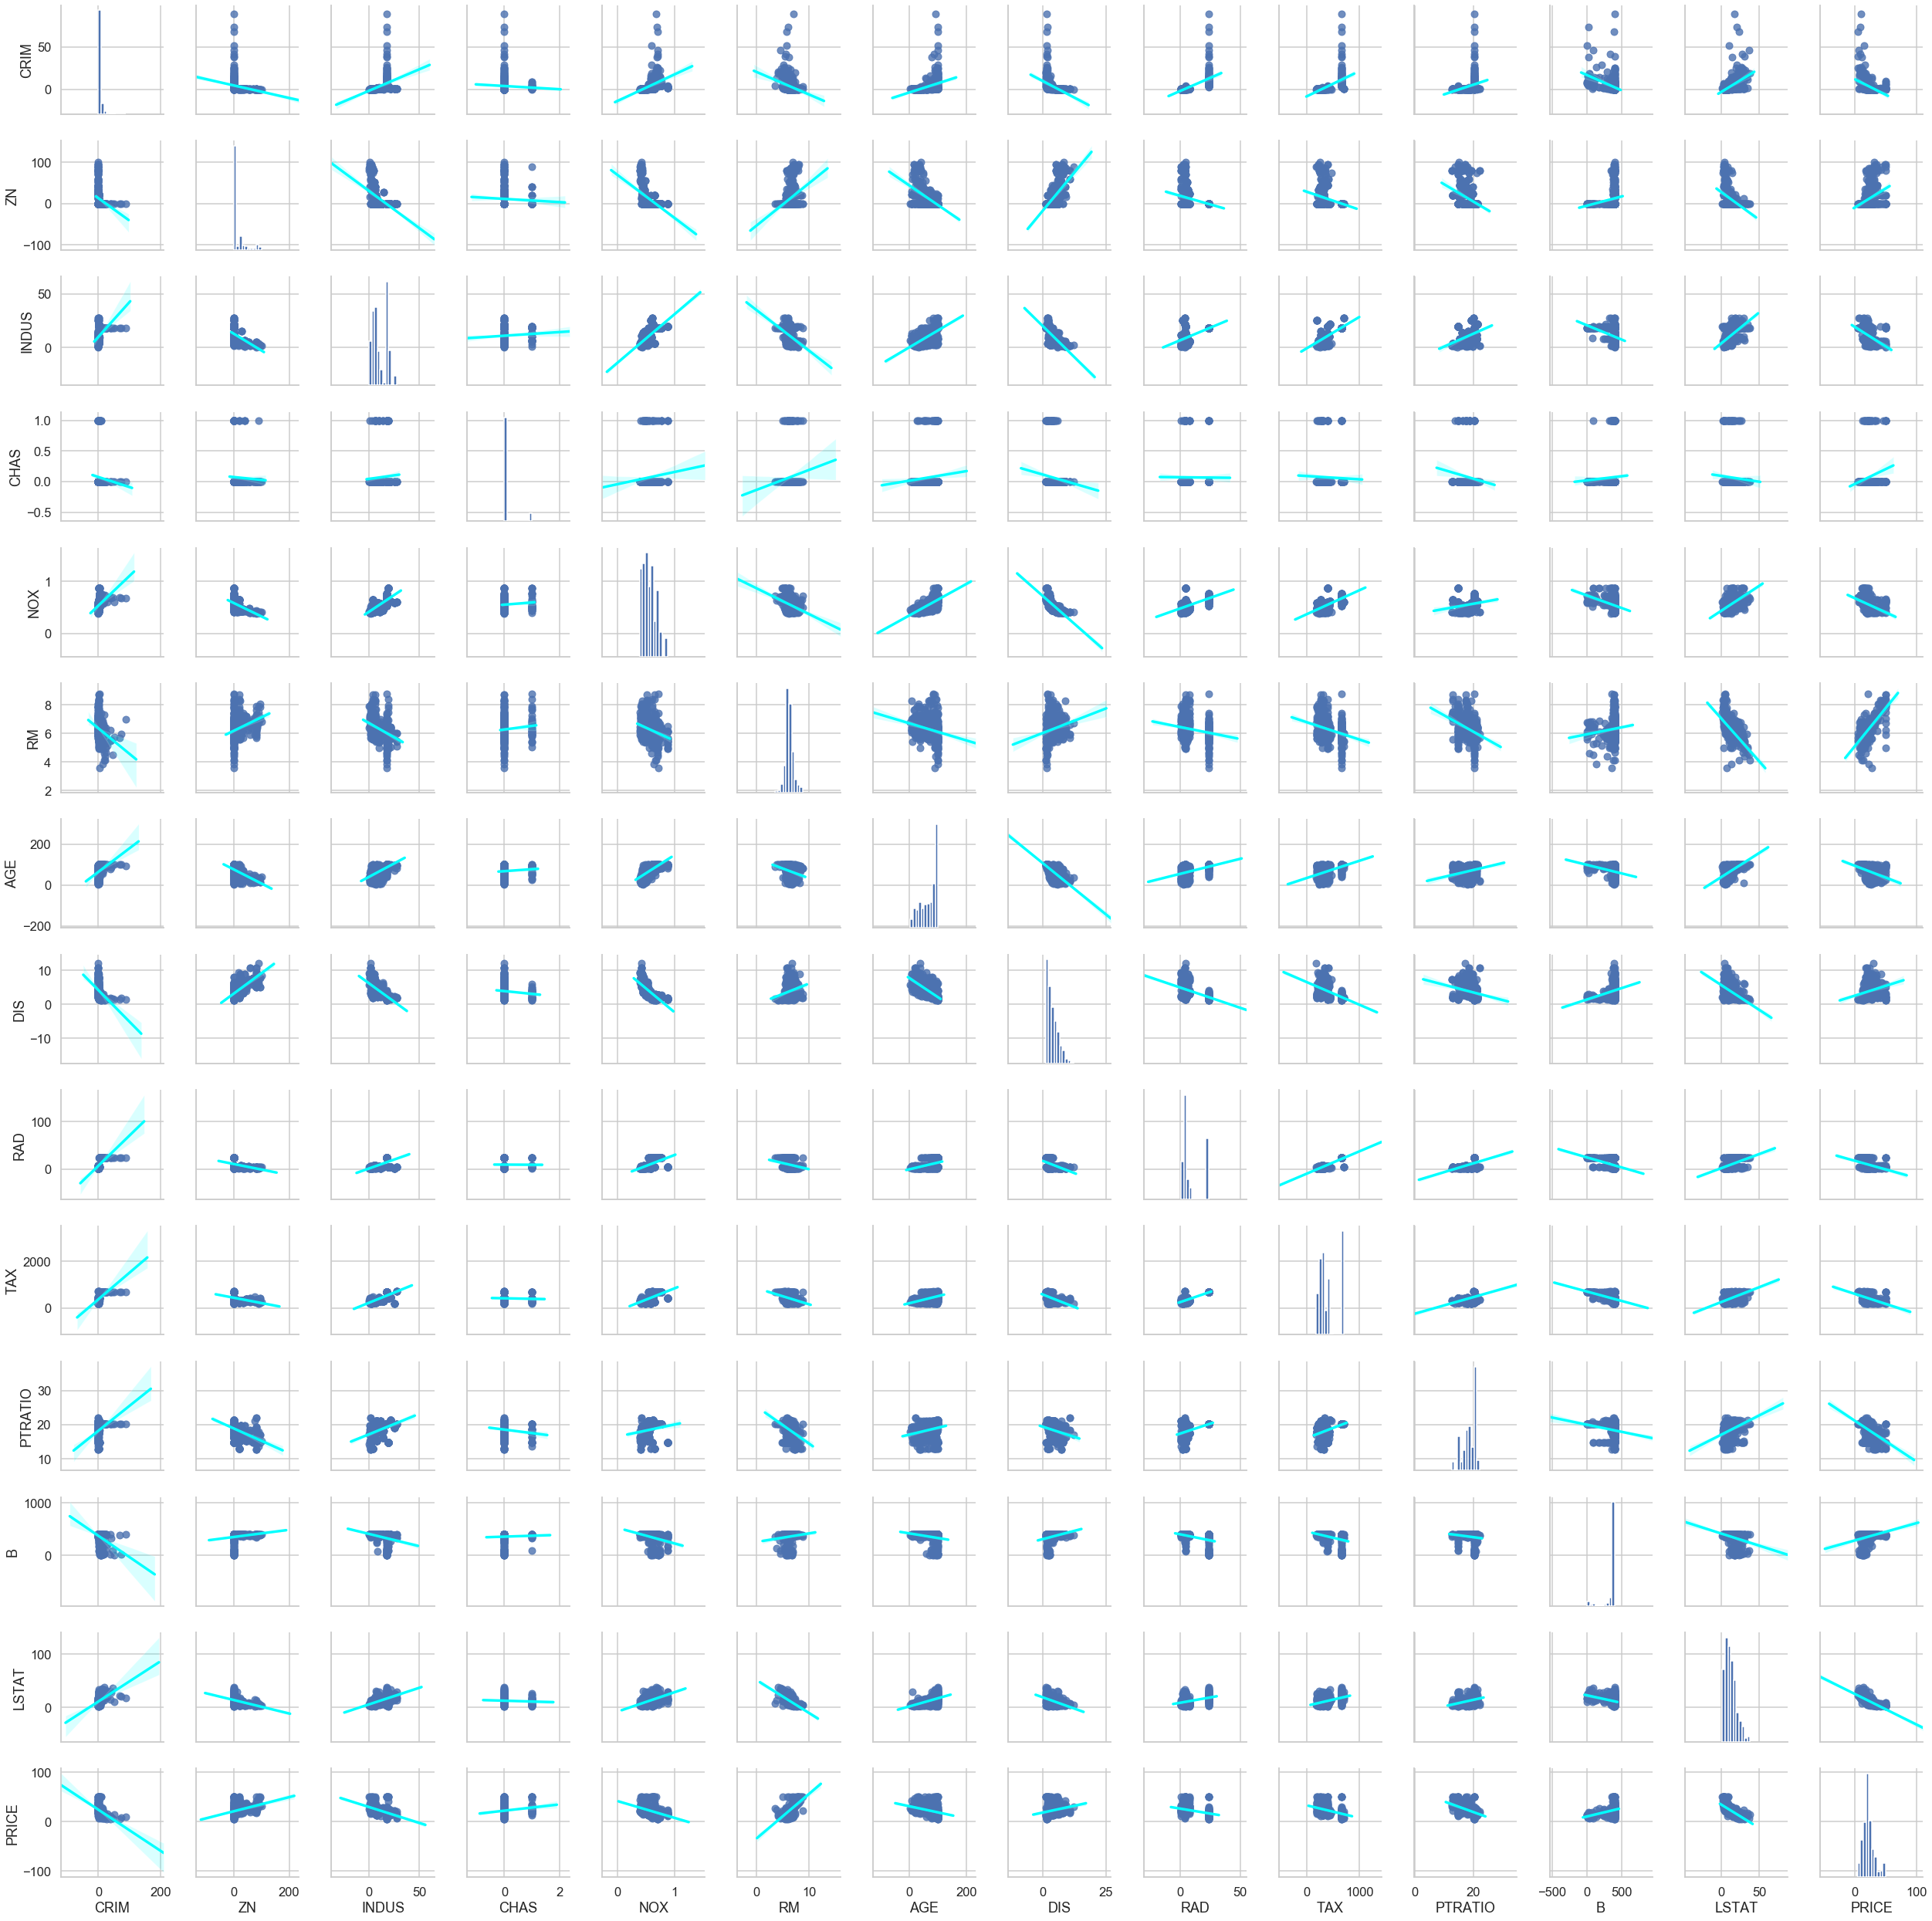

CPU times: user 2min 10s, sys: 529 ms, total: 2min 10s
Wall time: 59.7 s


In [824]:
%%time
#plot all the correlations with linear regression
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split

In [825]:
#Spliteamos la dataSet y la shuffoleamos en un 20% test y 80%train
prices = data['PRICE']
features = data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)



## Multivariable Regression

In [826]:
#Corremos la multivariable regression
regr = LinearRegression()

regr.fit(X_train,y_train)

print('Training date r-squared: ',regr.score(X_train,y_train))
print('Test date r-squared: ',regr.score(X_test,y_test))
print('Intercept: ',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['Coef'])

Training date r-squared:  0.750121534530608
Test date r-squared:  0.6709339839115628
Intercept:  36.53305138282439


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformation

In [827]:
#Checar el Skew del target
data['PRICE'].skew()

1.1080984082549072

Skew: -0.33032129530987864


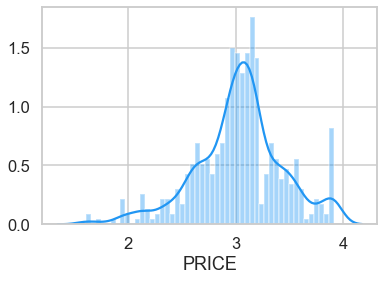

In [828]:
#Aplicamos log para mejorar el skew y aproximar a 0
y_log = np.log(data['PRICE'])
#El skew mejoró drasticamente
print('Skew:',y_log.skew())
sns.distplot(y_log,bins=50,hist=True,kde=True,color='#2196f3')
plt.show()

## Regression using log prices

In [829]:
#Volvemos a hacer la Linear Regression pero ahora con los Log Prices

prices = y_log #Usar log prices
features = data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

#Corremos la linear regression
regr = LinearRegression()

regr.fit(X_train,y_train)

print('Training date r-squared: ',regr.score(X_train,y_train))
print('Test date r-squared: ',regr.score(X_test,y_test))
print('Intercept: ',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['Coef'])

Training date r-squared:  0.7930234826697583
Test date r-squared:  0.7446922306260724
Intercept:  4.05994387177519


,Coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [830]:
#Los Coef están en log, para obtener valor real:
np.e**0.080331 #e^coef


1.0836456950439142

## P Values and evaluating Coef

In [831]:
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()
pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})

/Users/fernando/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

In [832]:
vif = []
for i in range(len(X_inc_const.columns)):
    vif.append(variance_inflation_factor(exog=X_inc_const.values,exog_idx =i))
pd.DataFrame({'coef_name' : X_inc_const.columns,'vif': np.around(vif,3)})
#Si nos da más de 10 entonces hay multicollinearity y podemos eliminar esa feature

,coef_name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


## Model Simplificaction and the BIC

In [833]:
#Model with log prices and all features
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})
print('Bic:',results.bic)
print('R-Squared(score)',results.rsquared)

Bic: -139.74997769478875
R-Squared(score) 0.7930234826697582


In [834]:
#Model with log prices and NO INDUS and NO AGE
X_inc_const = sm.add_constant(X_train)
X_no_INDUS_AGE = X_inc_const.drop(['INDUS','AGE'],axis=1)
model = sm.OLS(y_train,X_no_INDUS_AGE)
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})
print('Bic:',results.bic)
print('R-Squared(score)',results.rsquared)
#Vimos como BIC se hizo más pequeño sin tener un cambio significativo en la score por lo que es una buena simplifiación

Bic: -149.49934294224656
R-Squared(score) 0.7918657661852815


## Residuals and Residual Plotting

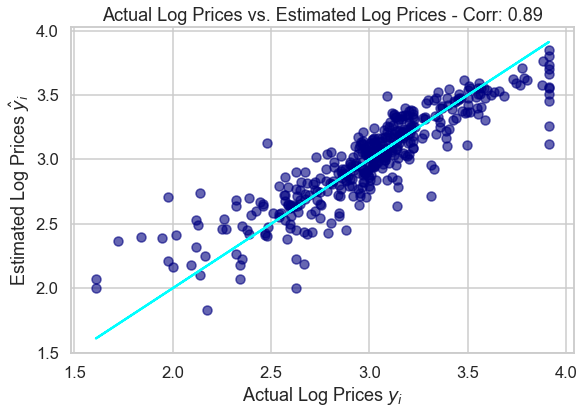

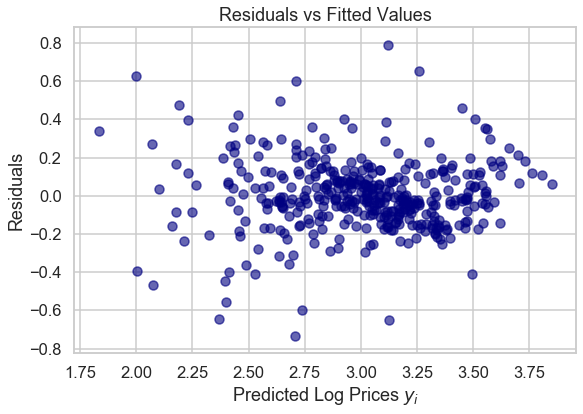

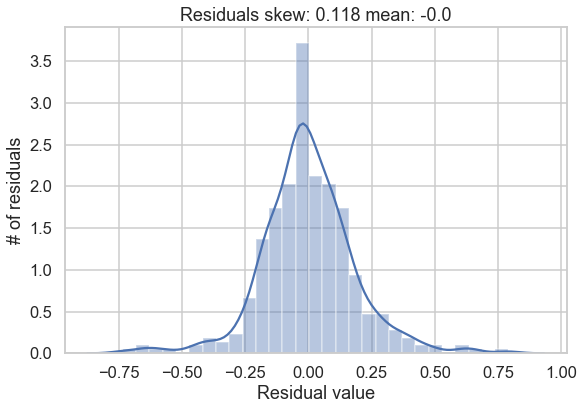

In [838]:
prices = y_log #Usar log prices
features = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_no_INDUS_AGE)
results = model.fit()
#results.resid

corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(9,6))
plt.title(f'Actual Log Prices vs. Estimated Log Prices - Corr: {corr}')
plt.scatter(y_train,results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,c='cyan')
plt.xlabel('Actual Log Prices $y _i$')
plt.ylabel('Estimated Log Prices $\hat y _i$')

plt.show()

#Residuals vs predicted values
plt.figure(figsize=(9,6))
plt.scatter(results.fittedvalues,results.resid,c='navy',alpha=0.6)
plt.xlabel('Predicted Log Prices $y _i$')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


plt.figure(figsize=(9,6))
sns.distplot(results.resid)
plt.xlabel('Residual value')
plt.ylabel('# of residuals')
plt.title(f'Residuals skew: {round(results.resid.skew(),3)} mean: {round(results.resid.mean(),3)}')
plt.show()

In [840]:
#Visualizamos en tabla la Score, MSE y RMSE
pd.DataFrame({'Score' : round(results.rsquared,3),
              'MSE': round(results.mse_resid,3),
              'RMSE': round(np.sqrt(results.mse_resid),3)},index=[0])

,Score,MSE,RMSE
0,0.792,0.035,0.187


In [841]:
#Para dar un rango en la estimate debemos restarle y sumarle dos desv. estándar o RMSE
upper_bound = 2*np.sqrt(results.mse_resid)

